<a href="https://colab.research.google.com/github/teliofm/codenation_ds/blob/master/main_codenation_challenge_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

from google.colab import files #Colab commands must be commented to codenation submission
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Para submissão ao codenation todo este código deve ser comentado
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [ ]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [ ]:
# Vizualização rápida do dataframe gerado
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   normal    10000 non-null  float64
 1   binomial  10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [ ]:
# The function describe is the fast way to look for differences between both data distributions
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


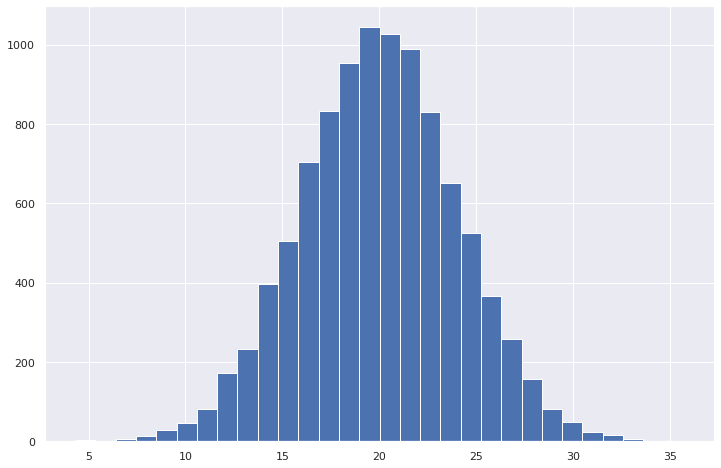

In [ ]:
# Distribuição dos Dados da Distribuição Normal
dataframe['normal'].hist(bins=30)

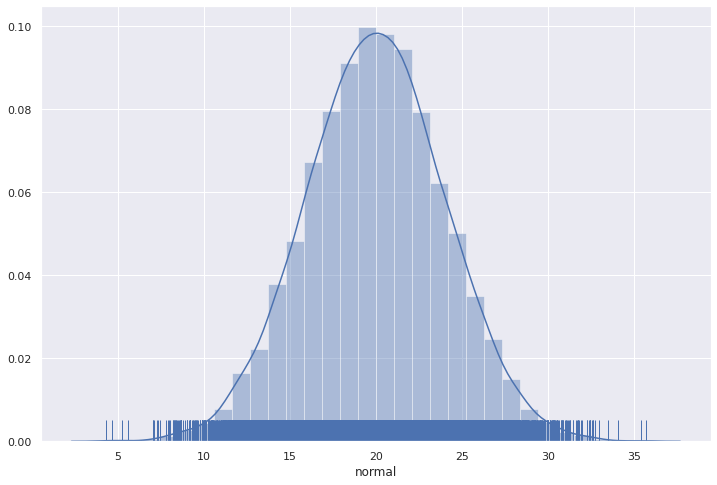

In [ ]:
sns.distplot(dataframe['normal'], rug=True, bins=30)

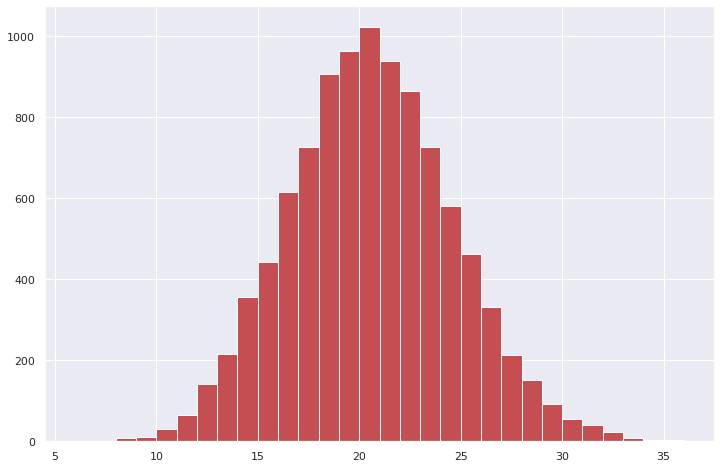

In [ ]:
# Distribuição dos Dados da Distribuição Binomial
dataframe['binomial'].hist(bins=30, color="r")

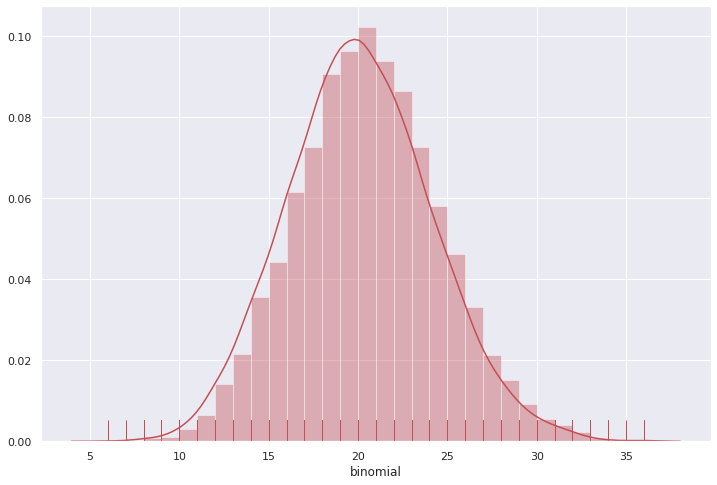

In [ ]:
sns.distplot(dataframe['binomial'], rug=True, color="r", bins=30)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

https://github.com/codenation-dev/Data-Science-Online/blob/master/Semana%203/aula_3_analise_exploratoria_de_dados.ipynb

https://github.com/codenation-dev/Data-Science-Online/blob/master/Semana%204/aula_4_distribuicoes_de_probabilidade.ipynb

https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_binomial

In [ ]:
# Separação dos dados em duas series para simplificar a escrita ao extrair
# informações de cada uma das distribuições.
Normal = dataframe['normal']
Binomial= dataframe['binomial']

In [ ]:
q1_norm, q2_norm, q3_norm = Normal.quantile((0.25,0.5,0.75))
q1_norm, q2_norm, q3_norm

(17.30963787997159, 19.98962009682849, 22.68432355145866)

In [ ]:
q1_binom, q2_binom, q3_binom = Binomial.quantile((0.25,0.5,0.75))
q1_binom, q2_binom, q3_binom

(17.0, 20.0, 23.0)

In [ ]:
def q1():
    return (round(q1_norm - q1_binom,3), round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3))
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [ ]:
# valor representativo a x¯−s
x_less_1s = Normal.mean()-Normal.std()
x_less_1s

15.977606544512675

In [ ]:
# valor representativo a x¯+s
x_plus_1s = Normal.mean()+Normal.std()
x_plus_1s

24.005305588539912

In [ ]:
# quantidade total de dados no intervalo [x¯−s,x¯+s]
sigma2vezes = dataframe[(x_less_1s <= dataframe['normal']) & (dataframe['normal'] <= x_plus_1s)].count()['normal']
sigma2vezes

6838

In [ ]:
# quantidade total de dados na amostra
quantidade_total = dataframe.shape[0]
quantidade_total

10000

In [ ]:
prob2sigma = sigma2vezes/quantidade_total
prob2sigma

0.6838

In [ ]:
def q2():
    return round(prob2sigma,3)
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
> Sim, 0.6837 contra o teórico de 0.6827
* Experimente também para os intervalos
 * $[\bar{x} - 2s, \bar{x} + 2s]$, e 
>> 0.9538 contra teórico de 0.9545
 * $[\bar{x} - 3s, \bar{x} + 3s]$
 >> 0.9973 igual teórico

In [ ]:
# Para 4 sigma
x_less_2s = Normal.mean()-2*Normal.std()
x_plus_2s = Normal.mean()+2*Normal.std()
sigma4vezes = dataframe[(x_less_2s <= dataframe['normal']) & (dataframe['normal'] <= x_plus_2s)].count()['normal']
prob4sigma = sigma4vezes/quantidade_total
prob4sigma

0.9538

In [ ]:
# Para 6 sigma
x_less_3s = Normal.mean()-3*Normal.std()
x_plus_3s = Normal.mean()+3*Normal.std()
sigma6vezes = dataframe[(x_less_3s <= dataframe['normal']) & (dataframe['normal'] <= x_plus_3s)].count()['normal']
prob6sigma = sigma6vezes/quantidade_total
prob6sigma

0.9973

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [ ]:
m_norm = Normal.mean()
v_norm = Normal.var()
m_binom = Binomial.mean()
v_binom = Binomial.var()
m_norm, v_norm, m_binom, v_binom

(19.991456066526293, 16.110987985368958, 20.097, 16.331224122412277)

In [ ]:
def q3():
    return round(m_binom - m_norm,3), round(v_binom - v_norm,3)
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
> Sim, já que o valor esperado (E = n.p) é o mesmo da média da distruição normal (20)
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?
> O valor esperado irá descrescer ou aumentar proporcionalmente a p (0.2)

## Parte 2

### Colab Commands

In [ ]:
file = files.upload() #Colab commands must be commented to codenation submission

Saving pulsar_stars.csv to pulsar_stars.csv


In [ ]:
!ls #Colab commands must be commented to codenation submission

'HTRU_2 (1).csv'   HTRU_2.csv   pulsar_stars.csv   sample_data


### _Setup_ da parte 2

In [ ]:
stars = pd.read_csv("pulsar_stars.csv", header=None) #incluso o header=None já que não havia cabeçalho

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [ ]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,False
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False


In [ ]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean_profile  17898 non-null  float64
 1   sd_profile    17898 non-null  float64
 2   kurt_profile  17898 non-null  float64
 3   skew_profile  17898 non-null  float64
 4   mean_curve    17898 non-null  float64
 5   sd_curve      17898 non-null  float64
 6   kurt_curve    17898 non-null  float64
 7   skew_curve    17898 non-null  float64
 8   target        17898 non-null  bool   
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


In [ ]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [ ]:
false_pulsar = stars.query('target == False')['mean_profile']
false_pulsar = false_pulsar.to_frame()
false_pulsar.head()

,mean_profile
0,140.562500
1,102.507812
2,103.015625
3,136.750000
4,88.726562


In [ ]:
false_pulsar['false_pulsar_mean_profile_standardized'] = StandardScaler().fit_transform(false_pulsar)
false_pulsar.head()

,mean_profile,false_pulsar_mean_profile_standardized
0,140.562500,1.373347
1,102.507812,-0.804269
2,103.015625,-0.775210
3,136.750000,1.155183
4,88.726562,-1.592878


In [ ]:
false_pulsar.describe()

,mean_profile,false_pulsar_mean_profile_standardized
count,16259.000000,1.625900e+04
mean,116.562726,2.251447e-16
std,17.475932,1.000031e+00
min,17.210938,-5.685239e+00
25%,105.253906,-6.471281e-01
50%,117.257812,3.977513e-02
75%,128.285156,6.707963e-01
max,192.617188,4.352088e+00


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [ ]:
quantil_80_perc, quantil_90_perc, quantil_95_perc = false_pulsar['false_pulsar_mean_profile_standardized'].quantile((0.8,0.9,0.95))
quantil_80_perc, quantil_90_perc, quantil_95_perc

(0.824986281211525, 1.2317188601147098, 1.5598140894585726)

In [ ]:
quantil_teorico_80_perc = sct.norm.ppf(0.8, loc=0, scale=1)
quantil_teorico_90_perc = sct.norm.ppf(0.9, loc=0, scale=1)
quantil_teorico_95_perc = sct.norm.ppf(0.95, loc=0, scale=1)
quantil_teorico_80_perc, quantil_teorico_90_perc, quantil_teorico_95_perc

(0.8416212335729143, 1.2815515655446004, 1.6448536269514722)

In [ ]:
cdf80 = sct.norm.cdf(quantil_80_perc, loc=0, scale=1)
cdf90 = sct.norm.cdf(quantil_90_perc, loc=0, scale=1)
cdf95 = sct.norm.cdf(quantil_95_perc, loc=0, scale=1)
cdf80, cdf90, cdf95 

(0.7953103103255066, 0.8909729389403294, 0.9405980895329333)

In [ ]:
ecdf = ECDF(false_pulsar['false_pulsar_mean_profile_standardized'])
ecdf

In [ ]:
def q4():
  return round(ecdf(quantil_teorico_80_perc),3), round(ecdf(quantil_teorico_90_perc),3), round(ecdf(quantil_teorico_95_perc),3)
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
> Sua distribuição difere um pouco da normal.
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
> Siga análise a seguir.

In [ ]:
# Skewness diferente de zero indica distribuição assimétrica
# Sendo negativa indica que a perna da esquerda é mais cumprida
false_pulsar['false_pulsar_mean_profile_standardized'].skew()

-0.10438614864479283

In [ ]:
# A Curtose mensura o quão agudo (concentrado) ou espalhados estão seus dados, 
# como referência a distribuição normal.
# A Curtose positiva significa que a distribuição é mais aguda que a normal,
# os dados estariam mais concentrados próximos a média, esta distribuição é
# chamada de leptokurtic (diferente de platykurtic - lepto/plati cúrtica).
false_pulsar['false_pulsar_mean_profile_standardized'].kurtosis()

0.36631172758927466

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [ ]:
def q5():
  Q1_25_perc, Q2_50_perc, Q3_75_perc = false_pulsar['false_pulsar_mean_profile_standardized'].quantile((0.25,0.50,0.75))
  Q1_teorico_25_perc = sct.norm.ppf(0.25, loc=0, scale=1) 
  Q2_teorico_50_perc = sct.norm.ppf(0.50, loc=0, scale=1)
  Q3_teorico_75_perc = sct.norm.ppf(0.75, loc=0, scale=1)
  Q1_dif = Q1_25_perc - Q1_teorico_25_perc
  Q2_dif = Q2_50_perc - Q2_teorico_50_perc
  Q3_dif = Q3_75_perc - Q3_teorico_75_perc
  return round(Q1_dif, 3), round(Q2_dif, 3), round(Q3_dif, 3)
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
> Como descrito na questão 4. A distribuição está mais concentrada que a normal, e skew negativo, mediana maior que a média (perna mais longa a esquerda).
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.